In [3]:
!pip install tensorflow

In [223]:
#Import the libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1088]:
# Import MNIST Dataset for  training
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [1104]:
train_X = train_X[:20000,:,:]
train_y = train_y[:20000]

(20000, 28, 28) (60000,)


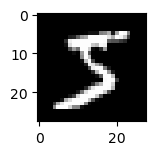

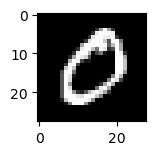

(20000, 28, 28)


In [1094]:
# preview
print(train_X.shape,train_y.shape)
for i in range(2):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [1198]:
# tf Sequential model with 28x28 dimensions
tf.random.set_seed(34)
model = Sequential(
    [
        # tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(input_shape=(28,28)),
        Dense(units = 40, activation = 'sigmoid', name="l0"),
        Dense(units = 25, activation = 'sigmoid', name="l1"),
        Dense(units = 10, activation = 'softmax', name="l2")
    ], name="my_model"
)
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_36 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l0 (Dense)                      │ (None, 40)             │        31,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l1 (Dense)                      │ (None, 25)             │         1,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,685 (127.68 KB)

 Trainable params: 32,685 (127.68 KB)

 Non-trainable params: 0 (0.00 B)

In [1200]:
# Using ADAM optimizer 
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
)

history = model.fit(
    train_X,train_y,
    epochs=240,
    validation_data=(test_X,test_y),
)

Epoch 1/240
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - loss: 2.0457 - val_loss: 1.2818
Epoch 2/240
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 1.1273 - val_loss: 0.8050
Epoch 3/240
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.7334 - val_loss: 0.5926
Epoch 4/240
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.5619 - val_loss: 0.4895
Epoch 5/240
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.4656 - val_loss: 0.4439
Epoch 6/240
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.4238 - val_loss: 0.3952
Epoch 7/240
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.3961 - val_loss: 0.3895
Epoch 8/240
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.3689 - val_loss: 0.3646
Epoch 9/240
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.3375 - val_loss: 0.3521
Epoch 10/240
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.3347 - val_loss: 0.3655
Epoch 11/240
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.3332 - val_loss: 0.3339
Epoch 12/240
625/62

In [1202]:
# Evaluating the model from test set

results = model.evaluate(test_X, test_y, batch_size=256)
predictions = model.predict(test_X[:test_y.shape[0]])

j = 0 
count=0
for i in predictions:
    if(np.argmax(i)!=test_y[j]):
        count+=1
    j+=1
print(f"\n{count}/{test_y.shape[0]} Wrong Predictions,\n{test_y.shape[0]-count}/{test_y.shape[0]} Right Predictions,\nLoss = {results}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.2157
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step

554/10000 Wrong Predictions,
9446/10000 Right Predictions,
Loss = 0.19590425491333008


Text(0, 0.5, 'Loss')

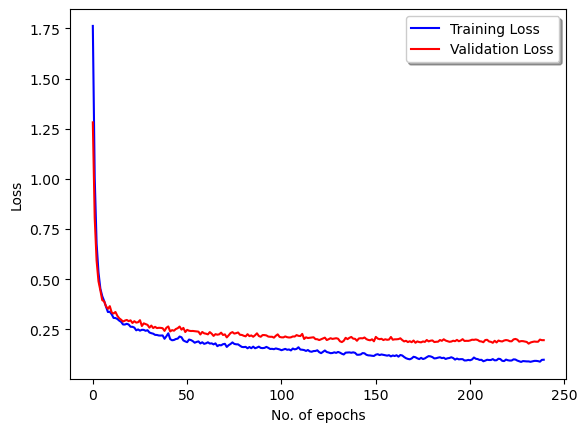

In [1204]:
# Plot Loss function with epochs

fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], color='b', label="Training Loss")
ax.plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax.legend(loc='best', shadow=True)

plt.xlabel('No. of epochs')
plt.ylabel('Loss')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
 prediction 
[[8.1533365e-08 3.2777592e-04 9.9927229e-01 2.8965904e-04 6.0311738e-09
  7.4459187e-08 2.2178374e-07 8.2338716e-05 2.7561611e-05 4.5087303e-09]]
 Largest Prediction index: 2


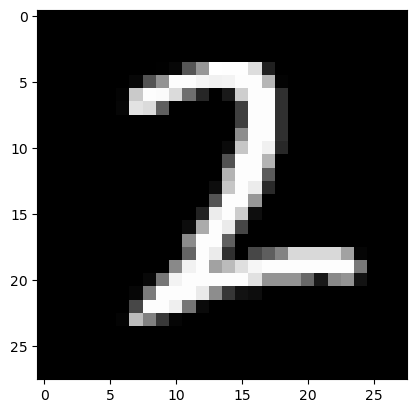

In [1206]:
#Predicting a value from the test set (MNIST)

example = 1336

image = test_X[example]
plt.imshow(test_X[example], cmap=plt.get_cmap('gray'))

prediction = model.predict(image.reshape(1,28,28))  # prediction

print(f" prediction \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[1.4031420e-03 5.9899339e-05 9.9950552e-04 4.3662269e-05 2.5914684e-01
  1.2234845e-02 7.2349828e-01 1.3312297e-04 1.3055393e-03 1.1750867e-03]]
Predicted Value = 6


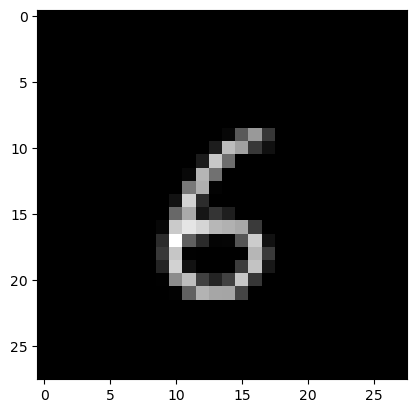

In [1222]:
#Predicting from own data
image = tf.keras.utils.load_img(
            'test_images/6.png',
            color_mode="grayscale",
            interpolation="nearest",
            keep_aspect_ratio=False,
        )
image = image.resize([28,28])
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr[:,:,0]
plt.imshow(input_arr, cmap=plt.get_cmap('gray'))

arr = input_arr.reshape(1,28,28)
predictions = model.predict(arr)
print(predictions)
print(f"Predicted Value = {np.argmax(predictions)}")